In [1]:
######################
#import useful modules
######################
import sys
sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from Modules import *
from Modules_gula import *

########

%matplotlib inline

no basemap module installed


In [2]:
simulname = 'gigatl3_1h'
time = 2540

simul = load(simul = 'gigatl3_1h [0,10000,0,10000,[1,200,1]] 2540');
domain = 'all'


simulname is None
args (['gigatl3_1h', '[0,10000,0,10000,[1,200,1]]', '2540'],)
args[0] ['gigatl3_1h', '[0,10000,0,10000,[1,200,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,10000,0,10000,[1,200,1]] [0,10
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[0, 4002, 0, 3002, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19, 

In [3]:

[lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
lon,lat = lon.T,lat.T

sst = var('temp',simul,depths=[0]).data

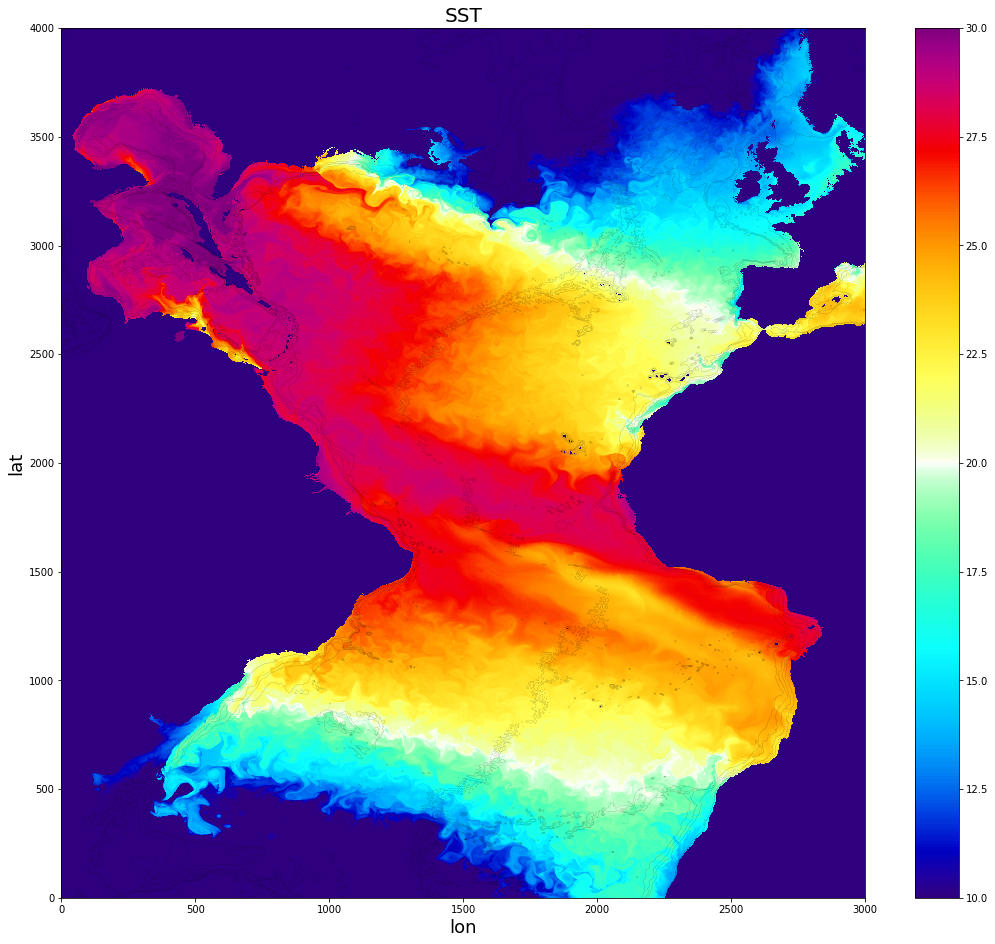

In [5]:

#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(18.0,16.0)) 
ax1 = plt.subplot(1,1,1);

plt.pcolormesh(lon,lat,ma.masked_invalid(sst),\
               cmap = plot.ncview_colormap('jaisnd'),vmin=10.,vmax=30.);

plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 
    
#plt.axis([vortices[ivort][0]-20,vortices[ivort][0]+20,vortices[ivort][1]-20,vortices[ivort][1]+20])
    
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title('SST', fontsize=20)

del sst, lon, lat


In [15]:

sigs = np.array([26.4, 27.,27.2,27.4,27.6, 27.8])

############

simulname = 'gigatl3_1h'
time = 2540

############

for laty in range(500,3500,100):

    ############

    ivort = 5
    domain = 'laty' + format(laty)

    #########

    iy = 5
    simul = load(simul = simulname + ' [' + format(laty-iy) + ',' + format(laty+iy)\
                                   +  ',0,10000,[1,300,1]] ' + format(time));


    #################################################
    #Compute vertical coordinates
    #################################################

    [z_r,z_w] = tools.get_depths(simul)

    # define z
    [_,_,z] =np.mgrid[0:z_r.shape[0],0:z_r.shape[1],0:z_r.shape[2]]

    # define lon in 3d
    lat3d = copy(z_r)
    for iz in range(lat3d.shape[2]):
        lat3d[:,:,iz] = simul.x #np.cumsum(1./(simul.pm)*1e-3,axis=0)


    #################################################

    vrt = (var('vrt',simul).data.T / tools.rho2psi(simul.f).T ).T

    rho = var('rho1',simul).data + simul.rho0 - 1000.

    #################################################


    #################################################
    # Plot  data
    #################################################
    levels = np.arange(-1.,1.01,0.01)*1.
    my_cmap=plot.ncview_colormap('blu_red')


    #################################################
    # Plot  data
    #################################################

    fig = plt.figure(figsize=(18.0,6.0))
    fig.set_tight_layout(1.)

    ###################

    ax1 = plt.subplot(1,1,1);
    plt.pcolormesh(tools.rho2psi(lat3d)[:,iy,:], tools.rho2psi(z_r)[:,iy,:],
                    vrt[:,iy,:], vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap); plt.colorbar()
    #CS1 = plt.contour(lat3d[:,iy,:],z_r[:,iy,:],np.max(z) - z[:,iy,:],range(300),colors = ('k',), linewidths = (0.2,));
    #plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

    CS2 = plt.contour(lat3d[:,iy,:],z_r[:,iy,:],rho[:,iy,:],sigs,colors = ('k',), linewidths = (0.8,));
    plt.clabel(CS2, fmt = '%1.4f', colors = 'k', fontsize=6)  ;

    plt.ylabel(r'z [m]',fontsize=18)
    plt.title(r'$\zeta/f$', fontsize=20)
    
    
    imin = np.min(np.where(z_w[:,iy,0]<-20))
    imax = np.max(np.where(z_w[:,iy,0]<-20))
    plt.xlim([simul.x[imin,iy],simul.x[imax,iy]])


    ###################

    plt.savefig('wide_vertical_section_' + domain +  '.png', size=None, figure=None,bbox_inches='tight', magnification='auto',transparent='true', dpi=150)
    plt.clf()



simulname is None
args (['gigatl3_1h', '[495,505,0,10000,[1,300,1]]', '2540'],)
args[0] ['gigatl3_1h', '[495,505,0,10000,[1,300,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [495,505,0,10000,[1,300,1]] [495,
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[495, 505, 0, 3002, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,

simulname is None
args (['gigatl3_1h', '[995,1005,0,10000,[1,300,1]]', '2540'],)
args[0] ['gigatl3_1h', '[995,1005,0,10000,[1,300,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [995,1005,0,10000,[1,300,1]] [995,
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[995, 1005, 0, 3002, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18, 

simulname is None
args (['gigatl3_1h', '[1495,1505,0,10000,[1,300,1]]', '2540'],)
args[0] ['gigatl3_1h', '[1495,1505,0,10000,[1,300,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [1495,1505,0,10000,[1,300,1]] [1495
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[1495, 1505, 0, 3002, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  

simulname is None
args (['gigatl3_1h', '[1995,2005,0,10000,[1,300,1]]', '2540'],)
args[0] ['gigatl3_1h', '[1995,2005,0,10000,[1,300,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [1995,2005,0,10000,[1,300,1]] [1995
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[1995, 2005, 0, 3002, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  

simulname is None
args (['gigatl3_1h', '[2495,2505,0,10000,[1,300,1]]', '2540'],)
args[0] ['gigatl3_1h', '[2495,2505,0,10000,[1,300,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [2495,2505,0,10000,[1,300,1]] [2495
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[2495, 2505, 0, 3002, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  

/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


simulname is None
args (['gigatl3_1h', '[2595,2605,0,10000,[1,300,1]]', '2540'],)
args[0] ['gigatl3_1h', '[2595,2605,0,10000,[1,300,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [2595,2605,0,10000,[1,300,1]] [2595
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[2595, 2605, 0, 3002, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  

simulname is None
args (['gigatl3_1h', '[3095,3105,0,10000,[1,300,1]]', '2540'],)
args[0] ['gigatl3_1h', '[3095,3105,0,10000,[1,300,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [3095,3105,0,10000,[1,300,1]] [3095
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[3095, 3105, 0, 3002, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

In [13]:
np.max(np.where(z_w[:,iy,0]<-20))

2737